In [52]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack

In [53]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder


In [55]:
from pre_processamento import pre_processamento, text_preprocess

In [54]:
from lightgbm import LGBMRegressor

In [95]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

In [56]:
train = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\train.tsv", sep='\t')
test = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\test.tsv", sep='\t')

In [57]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [58]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481661 entries, 0 to 1482534
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   name               1481661 non-null  object 
 1   item_condition_id  1481661 non-null  int64  
 2   brand_name         849325 non-null   object 
 3   price              1481661 non-null  float64
 4   shipping           1481661 non-null  int64  
 5   item_description   1481657 non-null  object 
 6   stock              1481661 non-null  int32  
 7   gen_cat            1481661 non-null  object 
 8   sub1_cat           1481661 non-null  object 
 9   sub2_cat           1481661 non-null  object 
 10  datetime_month     1474770 non-null  float64
 11  datetime_year      1474770 non-null  float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 141.3+ MB


In [60]:
train.head()

,name,item_condition_id,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [61]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [62]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [63]:
train.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'item_condition_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'shipping'}>,
        <AxesSubplot:title={'center':'stock'}>],
       [<AxesSubplot:title={'center':'datetime_month'}>,
        <AxesSubplot:title={'center':'datetime_year'}>]], dtype=object)

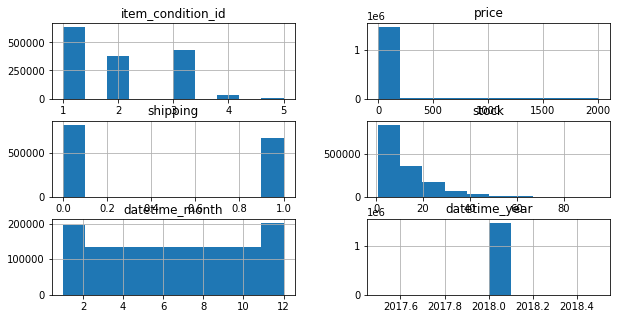

In [64]:
train.hist(figsize=(10,5))

In [65]:
X = train.drop("price", axis = 1)
y = train["price"]

#   Split

In [66]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.4, random_state=10) #Divisão em 60/40

<AxesSubplot:>

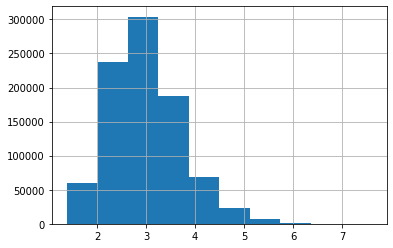

In [67]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain =  np.log1p(ytrain)
yval =  np.log1p(yval)
ytrain.hist()

In [68]:
Xtrain.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
285664,Jandals,3,NaN,0,Good condition,1,Women,Shoes,Sandals,4.0,2018.0
685118,Donkey Kong Country 2 Nintendo Game Boy,3,NaN,1,Will work with Nintendo GameBoy Advance SP. Ni...,3,Electronics,Video Games & Consoles,Consoles,8.0,2018.0
974069,NWT Mini hair straightener!,1,NaN,1,It's purple! Price includes half shipping Trav...,11,Beauty,Tools & Accessories,Hair Styling Tools,12.0,2018.0
778919,Sherri Hill prom dress,2,Sherri Hill,1,"Paid over [rm], asking [rm] (willing to negoti...",10,Women,Dresses,Full-Length,5.0,2018.0
1092378,Cardigan Bundle,3,Gap,0,"Two medium cardigans, both size mediums. One f...",17,Women,Sweaters,Cardigan,5.0,2018.0


In [69]:
Xval.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
20170,Swiss Army knife,1,NaN,1,New in original box. Never used.,13,Sports & Outdoors,Outdoors,Hiking & Camping,4.0,2018.0
155565,Dove Soap Mega LOT Assorted,1,Dove,0,(9) 4ct (36 bars total) Dove Soap (5) Febreze ...,1,Other,Daily & Travel items,Personal Care,6.0,2018.0
142735,"LOWEST PRICE, HIGHEST QUALITY BLENDER",1,NaN,1,STOP THROWING YOUR MAKEUP AWAY ! ! * ~ * Newes...,7,Beauty,Tools & Accessories,Makeup Brushes & Tools,1.0,2018.0
709876,Gold aluminum fidget spinner,1,NaN,1,Aluminum fidget spinner: Brand new . Comes in ...,13,Kids,Toys,Games,5.0,2018.0
723286,Duffle bag,3,NaN,0,Used duffle bag Perfect for young girls for tr...,43,Women,Women's Handbags,Totes & Shoppers,2.0,2018.0


In [70]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_features=50000) #vetorização, com stop word. 

In [71]:
ohe = OneHotEncoder(handle_unknown="ignore") 

#   Pré-processamento treino

In [72]:
Xtrain["name"] = Xtrain["name"].apply(lambda x: text_preprocess(x))

In [73]:
Xtrain["item_description"] = Xtrain["item_description"].astype(str)

In [74]:
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: text_preprocess(x))

In [75]:
Xtrain

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
285664,jandals,3,NaN,0,good condition,1,Women,Shoes,Sandals,4.0,2018.0
685118,donkey kong country 2 nintendo game boy,3,NaN,1,will work with nintendo gameboy advance sp. ni...,3,Electronics,Video Games & Consoles,Consoles,8.0,2018.0
974069,nwt mini hair straightener,1,NaN,1,it is purple price includes half shipping trav...,11,Beauty,Tools & Accessories,Hair Styling Tools,12.0,2018.0
778919,sherri hill prom dress,2,Sherri Hill,1,paid over rm asking rm willing to negotiate si...,10,Women,Dresses,Full-Length,5.0,2018.0
1092378,cardigan bundle,3,Gap,0,two medium cardigans both size mediums. one fr...,17,Women,Sweaters,Cardigan,5.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
1349096,drifit style leggings,2,No Boundaries,0,no description yet,19,Women,Athletic Apparel,"Pants, Tights, Leggings",11.0,2018.0
1154832,bundle for bonnie,2,Mossimo,0,size 4. beautiful dress with stretchy fabric t...,3,Women,Dresses,Knee-Length,10.0,2018.0
618168,jordan 6 retro is,2,NaN,0,item for sale jordan 6 retro is size 10c condi...,4,Kids,Boys 2T-5T,Shoes,12.0,2018.0
1049143,vintage victoria is secret slip,3,Victoria's Secret,0,vintage gold tag victoria is secret lingerie s...,1,Women,Tops & Blouses,"Tank, Cami",6.0,2018.0


In [76]:
vce_xtrain_name = vec.fit_transform(Xtrain["name"])
vce_xtrain_descrip = vec.fit_transform(Xtrain["item_description"])

In [77]:
vce_xtrain_name

<888996x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 3427871 stored elements in Compressed Sparse Row format>

In [78]:
vce_xtrain_descrip

<888996x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 12519643 stored elements in Compressed Sparse Row format>

In [79]:
#aplicação dummy nas colunas categóricas.

ohe_condition = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [80]:
ohe_condition

<888996x5177 sparse matrix of type '<class 'numpy.float64'>'
	with 6222972 stored elements in Compressed Sparse Row format>

In [81]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vce_xtrain_name),
                 (vce_xtrain_descrip),
                 (ohe_condition),
                                     ]) 

In [82]:
x_train

<888996x105177 sparse matrix of type '<class 'numpy.float64'>'
	with 22170486 stored elements in Compressed Sparse Row format>

#   Pré-processamento validation

In [83]:
Xval["name"] = Xval["name"].apply(lambda x: text_preprocess(x))

In [84]:
Xval["item_description"] = Xval["item_description"].astype(str)

In [85]:
Xval["item_description"] = Xval["item_description"].apply(lambda x: text_preprocess(x))

In [86]:
vce_xval_name = vec.transform(Xval["name"])
vce_xval_descrip = vec.transform(Xval["item_description"])

In [87]:
vce_xval_name

<592665x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 2256214 stored elements in Compressed Sparse Row format>

In [88]:
vce_xval_descrip

<592665x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 8330339 stored elements in Compressed Sparse Row format>

In [89]:
ohe_condition_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [90]:
ohe_condition_val

<592665x5177 sparse matrix of type '<class 'numpy.float64'>'
	with 4147824 stored elements in Compressed Sparse Row format>

In [91]:
x_val = hstack([
                 (vce_xval_name),
                 (vce_xval_descrip),
                 (ohe_condition_val),
                                     ]) 

# Modelo

In [92]:
lgb = LGBMRegressor(device = "gpu")

In [93]:
p = lgb.fit(x_train,ytrain) #2minutos para treino

In [99]:
ypredict = p.predict(x_val)

In [106]:
ypredict = np.expm1(ypredict)
yval =np.expm1(yval)

In [107]:
print('RMSLE: %2f' % mean_squared_log_error(ypredict,yval))
print('RMSE: %2f' % (mean_squared_error(ypredict,yval)))

RMSLE: 0.337262
RMSE: 1135.077234


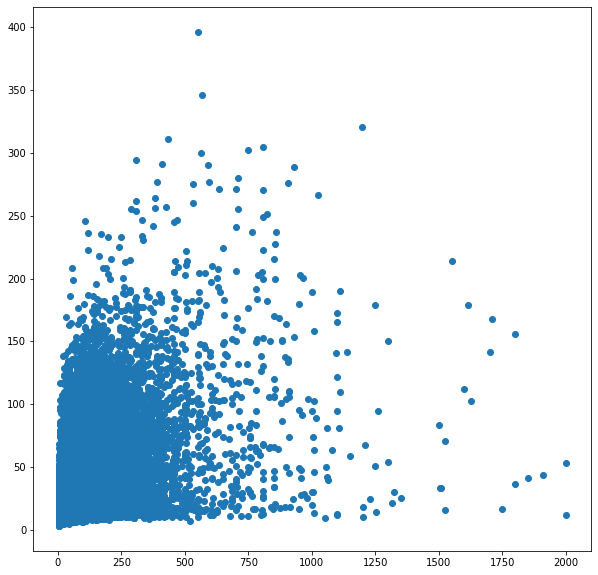

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=ypredict)